In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0) #Set for reproducibility

In [ ]:
#We'll first define our activation function
def activation_function(name):
    """
    Returns the mathematical expression of a chosen activation function
    either sigmoid or relu

    Input:
      name: str variable, accepts 'relu' and 'sigmoid'
    Output:
      returns lambda function mathematical expression for activation function
    """
    if(name == 'sigmoid'):
        return lambda x: 1/(1+np.exp(-x))
    elif(name == 'relu'):
        return lambda x: np.maximum(x, 0)

#We also define the derivative of the activation function
def grad_activation_function(name):
    """
    Returns the mathematical expression of a chosen activation function's derivative
    either sigmoid or relu

    Input:
      name: str variable, accepts 'relu' and 'sigmoid'
    Output:
      returns lambda function mathematical expression for derivative of the activation function
    """
    if(name == 'sigmoid'):
        sigmoid = lambda x: 1/(1 + np.exp(-x))
        return lambda x: sigmoid(x) * (1 - sigmoid(x)) 
    elif(name == 'relu'):
        return lambda x: np.heaviside(x, 0)

In [ ]:
#Now define functions for the forward training and backprop
def feedforward(self, x):
   """
   Helper function to encode the feed forward behavior of a network, a given 
   layer will go as:
   activation_function(weights * input + bias)
   WHich is then fed to the next layer.
   Input:
      x: input vector
   Output:
      z_s: list of inputs to activation function in a given layer
      a_s: activation function outputs
   """
   a = np.copy(x)
   z_s = []
   a_s = [a]
   for i in range(len(self.weights)):
      activation_function = self.activation_function(self.activations[i])
      z_s.append(self.weights[i].dot(a) + self.biases[i])
      a = activation_function(z_s[-1])
      a_s.append(a)
   return (z_s, a_s)

def backpropagation(self, y, z_s, a_s):
   """
   Helper function to encode the backprop of a network, a given 
   layer will go as:
   activation_function(weights * input + bias)
   WHich is then fed to the next layer.
   Input:
      y: true values of the function we wish to approximate
      z_s: list of 
      a_s: list of 
   Output:
      dw: derivative of weight matrix
      db: derivative of bias matrix
   """
   dw = []  # dJ/dw
   db = []  # dJ/db
   deltas = [None] * len(self.weights)  #error for each layer
   #Retrieve error from previous layer
   deltas[-1] = ((y-a_s[-1])*(self.grad_activation_function(self.activations[-1]))(z_s[-1]))
   #Perform BackPropagation
   for i in reversed(range(len(deltas)-1)):
      deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.grad_activation_function(self.activations[i])(z_s[i]))        
   batch_size = y.shape[1]
   db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
   dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
   return dw, db

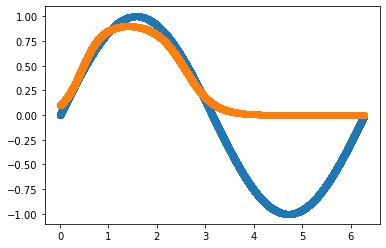

In [ ]:
class NeuralNetwork(object):
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'sigmoid']):
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    def feedforward(self, x):
        """
        Helper function to encode the feed forward behavior of a network, a given 
        layer will go as:
        activation_function(weights * input + bias)
        WHich is then fed to the next layer.
        Input:
            x: input vector
        Output:
            z_s: list of inputs to activation function in a given layer
            a_s: activation function outputs
        """
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.weights)):
            activation_function = self.activation_function(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)

    def backpropagation(self, y, z_s, a_s):
        """
        Helper function to encode the backprop of a network, a given 
        layer will go as:
        activation_function(weights * input + bias)
        WHich is then fed to the next layer.
        Input:
            y: true values of the function we wish to approximate
            z_s: list of 
            a_s: list of 
        Output:
            dw: derivative of weight matrix
            db: derivative of bias matrix
        """
        dw = []  # dJ/dw
        db = []  # dJ/db
        deltas = [None] * len(self.weights)  #error for each layer
        #Retrieve error from previous layer
        deltas[-1] = ((y-a_s[-1])*(self.grad_activation_function(self.activations[-1]))(z_s[-1]))
        #Perform BackPropagation
        for i in reversed(range(len(deltas)-1)):
            deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.grad_activation_function(self.activations[i])(z_s[i]))        
        batch_size = y.shape[1]
        db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
        dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
        return dw, db

    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
        for e in range(epochs): 
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                i = i+batch_size
                z_s, a_s = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                #print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch)))

    @staticmethod
    def activation_function(name):
        """
        Returns the mathematical expression of a chosen activation function
        either sigmoid or relu

        Input:
          name: str variable, accepts 'relu' and 'sigmoid'
        Output:
          returns lambda function mathematical expression for activation function
        """
        if(name == 'sigmoid'):
            return lambda x: 1/(1 + np.exp(-x))
        elif(name == 'relu'):
            return lambda x: np.maximum(x, 0)
    
    @staticmethod
    def grad_activation_function(name):
        """
        Returns the mathematical expression of a chosen activation function's derivative
        either sigmoid or relu

        Input:
          name: str variable, accepts 'relu' and 'sigmoid'
        Output:
          returns lambda function mathematical expression for derivative of the activation function
        """
        if(name == 'sigmoid'):
            sigmoid = lambda x: 1/(1 + np.exp(-x))
            return lambda x: sigmoid(x) * (1 - sigmoid(x)) 
        elif(name == 'relu'):
            return lambda x: np.heaviside(x, 0)

if __name__=='__main__':
    nn = NeuralNetwork([1, 100, 1], activations = ['sigmoid', 'sigmoid'])
    X = 2 * np.pi * np.random.rand(15000).reshape(1, -1)
    y = np.sin(X)
    
    nn.train(X, y, epochs = 5000, batch_size = 64, lr = .1)
    _, a_s = nn.feedforward(X)
    plt.scatter(X.flatten(), y.flatten())
    plt.scatter(X.flatten(), a_s[-1].flatten())
    plt.show()